In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Read the KLMO data
df = pd.read_csv('./LMO.csv')

In [3]:
# Cloud cover types are Overcast, Broken, Scattered, Clear
df_cloudy = df.loc[(df['skyc1'] == 'OVC') | (df['skyc1'] == 'BKN') | (df['skyc1'] == 'SCT') | (df['skyc1'] == 'CLR')].copy()

# Use hour, month, and year for the classification
df_cloudy['time'] = pd.to_datetime(df_cloudy['valid'], format = '%Y-%m-%d %H:%M')
df_cloudy['hour'] = df_cloudy['time'].dt.hour
df_cloudy['month'] = df_cloudy['time'].dt.month
df_cloudy['year'] = df_cloudy['time'].dt.year
df_cloudy['day'] = df_cloudy['time'].dt.day

# Drop other variables and then NaNs
df_cloudy.index = df_cloudy['time']
df_cloudy.drop(columns=['station', 'valid', 'gust_mph', 'skyc2', 'skyc3', 'skyl1', 'skyl2', 'skyl3', 'p01i', 'time'], inplace=True)
df_cloudy.dropna(inplace=True)

df_cloudy

,tmpf,relh,drct,sped,alti,skyc1,hour,month,year,day
time,,,,,,,,,,
2011-04-18 17:53:00,57.20,51.63,50.0,5.75,29.64,OVC,17,4,2011,18
2011-04-18 18:13:00,57.20,51.63,60.0,9.20,29.63,OVC,18,4,2011,18
2011-04-18 18:33:00,57.74,50.99,20.0,8.05,29.63,OVC,18,4,2011,18
2011-04-18 18:53:00,58.10,49.29,10.0,5.75,29.62,OVC,18,4,2011,18
2011-04-18 19:13:00,59.72,47.17,80.0,8.05,29.61,OVC,19,4,2011,18
...,...,...,...,...,...,...,...,...,...,...
2022-02-23 19:15:00,14.20,44.30,340.0,3.45,30.08,SCT,19,2,2022,23
2022-02-23 19:35:00,11.50,48.96,310.0,5.75,30.07,SCT,19,2,2022,23
2022-02-23 19:55:00,9.90,49.87,0.0,0.00,30.04,SCT,19,2,2022,23


In [4]:
X = df_cloudy[['tmpf', 'relh', 'drct', 'sped', 'alti', 'hour', 'month', 'year', 'day']]
y = df_cloudy['skyc1']

# Split data into training/testing (clear is most likely, so stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [5]:
# Random forest classification
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [6]:
# Prediction from the test dataset
y_pred = forest.predict(X_test)

In [7]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8107470668649631

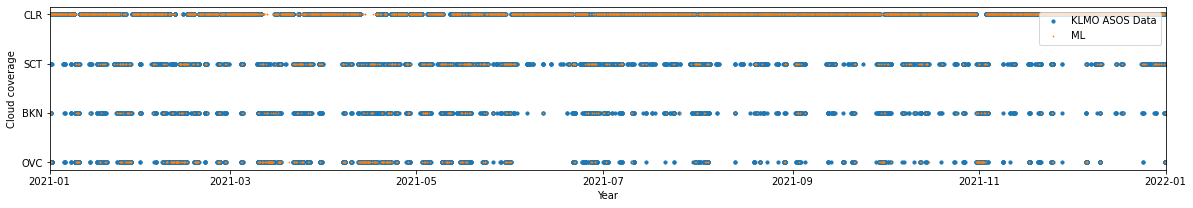

In [8]:
# Plot the last year of cloud coverage and the ML prediction
fig, ax = plt.subplots(figsize=(20,3))

ax.set_xlim([datetime.date(2021, 1, 1), datetime.date(2022, 1, 1)])
ax.scatter(df_cloudy.index, df_cloudy['skyc1'], color='C0', s=10, label='KLMO ASOS Data')
ax.scatter(y_test.index, y_pred, color='C1', s=0.5, label='ML')
ax.set_ylabel(r'Cloud coverage')
ax.set_xlabel('Year')
ax.legend(loc='upper right')